## PAN CARD TAMPERING DETECTION

<p> The purpose of this project is to detect tampering of PAN Card using computer vision. This project will help different organization in detecting whether the id i.e the PAN Card provided to them by their employees or customers or anyone is original or not.</P>
<br>
<p>For this project we will calculate structural similarity of original PAN Card and the PAN Card uploaded by user.</p>

In [1]:
!pip install scikit-image imutils opencv-python pillow requests

     --------------------------------------- 12.8/12.8 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 41.3/41.3 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.6 MB/s eta 0:00:00
     ------------------------------------- 226.5/226.5 kB 13.5 MB/s eta 0:00:00
     ------------------------------------- 315.8/315.8 kB 19.1 MB/s eta 0:00:00
  Running setup.py install for imutils: started
  Running setup.py install for imutils: finished with status 'done'


  DEPRECATION: imutils is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#importing packages
import cv2
from PIL import Image
from skimage.metrics import structural_similarity
import imutils
import requests
import warnings
warnings.filterwarnings("ignore")

In [3]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

The syntax of the command is incorrect.


In [9]:
#open image & display
original=Image.open(requests.get("https://akm-img-a-in.tosshub.com/businesstoday/images/story/201701/pan_660_011417021643.jpg?size=1280:720",stream=True).raw)
tampered=Image.open(requests.get("https://editor.analyticsvidhya.com/uploads/83117tampered.png",stream=True).raw)

In [10]:
#file format of the source file
print("Original image format : ",original.format)
print("Original image format : ",tampered.format)

Original image format :  JPEG
Original image format :  PNG


In [11]:
#image size, in pixel
print("Original size :",original.size)
print("Tampered size :",tampered.size)

Original size : (1280, 720)
Tampered size : (250, 160)


In [12]:
#resize image
original=original.resize((250,160))
print(original.size)
tampered=tampered.resize((250,160))
print(tampered.size)

(250, 160)
(250, 160)


In [13]:
#save image
original.save("pan_card_tampering/image/original.png")
tampered.save("pan_card_tampering/image/tampered.png")

In [ ]:
#change image type if required from png to jpeg
tampered=Image.open("pan_card_tampering/image/tampered.png")
tampered.save("pan_card_tampering/image/tampered.png")  #can do png to jpg

### Converting thde size of the tampered and original image

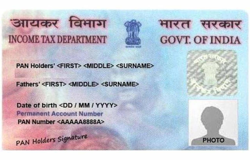

In [ ]:
#display original image
original

### Original PAN card image used for comparision

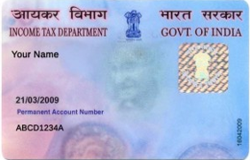

In [ ]:
#display user givien image
tampered

### User provided image which will be compared with PAN card

In [14]:
#load the two input images
original=cv2.imread("pan_card_tampering/image/original.png")
tampered=cv2.imread("pan_card_tampering/image/tampered.png")

### Reading images using opencv

In [15]:
#convert the images to grayscale
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

<p>Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to undrstand by m\c because they have 3 channel (RGB) while grayscale has only 1 channel.</p>

In [16]:
#compute the Structural Similarity Index (SSIM) between the 2 images, ensuring that the difference image is returned
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True) #passes the grayscales tampered and original image
diff=(diff*255).astype("uint8")
print("SSIM : {}".format(score))

SSIM : 0.28395241013735983


<p>Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are.</p>
<p>Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [17]:
#calculating threshold and contours
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)

<p>Here we are using the threshold function of computer vision which aapplies an adaptive threshold to the image which is stored in the form away.This function transforms the grayscale image into a binary image using a mathematical formula.
<p>Find contours works on binary image and retrive the contours.This contours are a useful tool for shape analysis and recognition.Grab contours grabs the appropriate value of the contours.  

In [18]:
#loop over the contours
for c in cnts:
  #applying contours on image
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

<p>Bounding the rectangle helps in finding thr ratio of width of height of the object.We compute the bounding box of the contour and then draw the bounding box on both input  images to represent where two images are diffenrent or not.

Origina; format Image


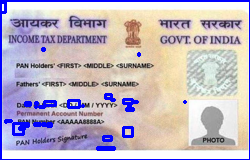

In [19]:
#display original image with contour
print("Origina; format Image")
Image.fromarray(original)

Tampered Image


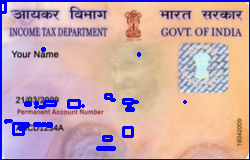

In [20]:
#display tampered image with contour
print("Tampered Image")
Image.fromarray(tampered)

Different Image


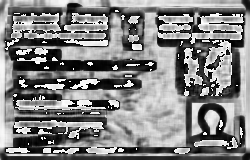

In [21]:
#dislay difference image with black
print("Different Image")
Image.fromarray(diff)

Threshold Image


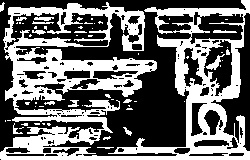

In [22]:
#display threshold image with white
print("Threshold Image")
Image.fromarray(thresh)

### Summary
<p>Finding out structural similarity of the images helped us in finding gthe diference or similarity in the shape of the imsges.
<p>Similarly,finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
<p>As,our SSIM is ~28.3% we can say that the image user provided is fake or tampered.
<p>Finallly we visualized the differences and similarities between the images using by displaying the images with contours,difference and threshold.

### Scope
<p>This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified.The organization can use this project to find out whether the ID is original or fake.Similarly this can be used for any type of ID like Aadhar,Voter ID etc.